Read in &cleansing data
==

In [1]:
import pandas as pd
cars = pd.read_csv("imports-85.data", header=None)
#header is missing from dataset, assign manually
cars.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
def print_title(title, to_print):
    print("="*len(title))
    print(title)
    print("="*len(title))
    print(to_print)
    
print_title("display head", cars.head(3))

display head
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   

  highway-mpg  price  
0

Observations:
1. Target column: price
2. Feature columns: all the rest cols. 
3. We should normalize value cols before analyzing.

In [2]:
import numpy as np
cars = cars.replace("?", np.nan)
num_cols = ["symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars[num_cols] = cars[num_cols].astype("float")
print_title("total rows", cars.shape[0])

#drop normalized-losses col
cars = cars.drop("normalized-losses", 1)
#drop rows with nan in cols listed below
cols_w_nan = ["num-of-doors", "bore", "stroke", "horsepower", "peak-rpm", "price"]
cars = cars.dropna()
print_title("display na count for each col", cars.isnull().sum())
cars_num = cars.select_dtypes(include=["float"])
cars_normalized = (cars_num - cars_num.mean()) / cars_num.std()

total rows
205
display na count for each col
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Univariate models
==

mean of rmse: 6609.7622065
std of rmse: 3084.60037279


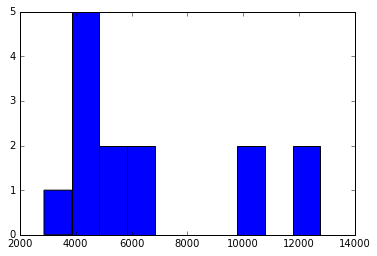

mean of rmse: 5158.95183212
std of rmse: 1665.83315616


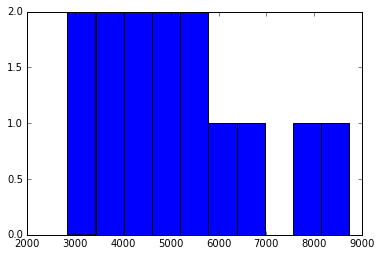

mean of rmse: 5138.74471388
std of rmse: 1495.99221123


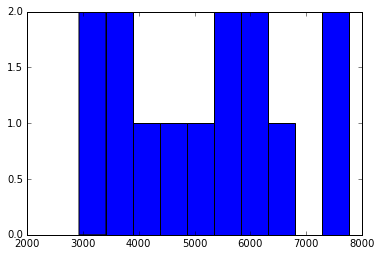

mean of rmse: 5235.99125442
std of rmse: 1528.92250334


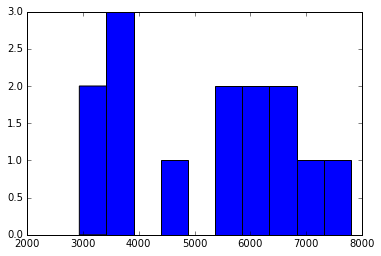

mean of rmse: 5254.83627393
std of rmse: 1646.83519253


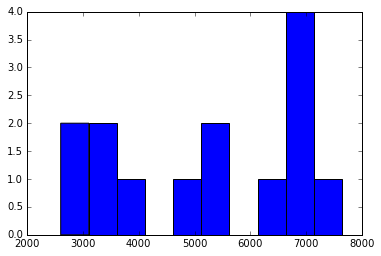

In [3]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(training_cols, target_col, df, k_values):
    
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset
    split_point = math.ceil(len(df)*0.75)
    train = df[:split_point-1]
    test = df[split_point-1:]
    
    #train/test/plot
    for k in k_values:
        rmse_list = []
        rmse_dict = {}
        for training_col in training_cols:
            knn = KNeighborsRegressor(k)
            knn.fit(train[[training_col]], train[target_col])
            pred = knn.predict(test[[training_col]])
            rmse = mean_squared_error(test[target_col], pred)**0.5
            rmse_list.append(rmse)
            rmse_dict[training_col] = rmse
        rmse_k_sorted_keys = sorted(rmse_dict, key=rmse_dict.get, reverse=False)
        #for col in rmse_k_sorted_keys:
            #print (col, rmse_dict[col])
        print("mean of rmse:", np.mean(rmse_list))
        print("std of rmse:", np.std(rmse_list))
        plt.hist(rmse_list)
        plt.show()

train_col = list(cars_normalized.columns)
train_col.remove("price") 
#list.remove() method does not return anything, DO NOT assign it back to the list
k_values = [1, 3, 5, 7, 9]
knn_train_test(train_col, "price", cars, k_values)


Multivariate models
==

In [24]:
def knn_train_test_multi(training_cols, target_col, df, k_values):
    
    #randomize
    np.random.seed(1)
    shuffled_idx = np.random.permutation(df.index)
    df = df.loc[shuffled_idx]
    
    #split dataset
    split_point = math.ceil(len(df)*0.75)
    train = df[:split_point-1]
    test = df[split_point-1:]
    
    #train/test/plot
    if k_values == None:
        knn = KNeighborsRegressor()
        knn.fit(train[training_cols], train[target_col])
        pred = knn.predict(test[training_cols])
        rmse = mean_squared_error(test[target_col], pred)**0.5
        return "rmse:", rmse
    else:
        print(0)
        rmse_w_k = {}
        for k in k_values:
            knn = KNeighborsRegressor(k)
            knn.fit(train[training_cols], train[target_col])
            pred = knn.predict(test[training_cols])
            rmse = mean_squared_error(test[target_col], pred)**0.5
            rmse_w_k[k] = rmse
            rmse_sorted_k = sorted(rmse_w_k, key=rmse_w_k.get, reverse=False)
            #for col in rmse_k_sorted_keys:
                #print (col, rmse_dict[col])
            return "rmse:", rmse

train_col = list(cars_normalized.columns)
train_col.remove("price") 
#list.remove() method does not return anything, DO NOT assign it back to the list
print_title("all features", knn_train_test_multi(train_col, "price", cars, None))


all features
('rmse:', 2182.3281926438481)
